## Статистический анализ данных пользователей сервиса аренды самокатов GoFast.

## Цель проекта: провести анализ данных пользователей сервиса и проверить гипотезы, которые могут вырасти бизнесу.

In [1]:
pip install pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Загрузка данных и знакомство с ними.

In [3]:
try:
    data_users = pd.read_csv('C:/Users/user/Desktop/юпитер/самокаты/users_go.csv')
    data_riders = pd.read_csv('C:/Users/user/Desktop/юпитер/самокаты/rides_go.csv')
    data_subscriptions = pd.read_csv('C:/Users/user/Desktop/юпитер/самокаты/subscriptions_go.csv')
except:
    data_users = pd.read_csv('/datasets/users_go.csv')
    data_riders = pd.read_csv('/datasets/rides_go.csv')
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

Перед началом работы с данными необходимо с ними ознакомиться.

In [4]:
display(data_users.shape[:])
display(data_riders.shape[:])
display(data_subscriptions.shape[:])

(1565, 5)

(18068, 4)

(2, 4)

In [5]:
data_users.info()
data_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
data_riders.info()
data_riders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
data_subscriptions.info()
data_subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Данные хорошо выгрузились, в них нет пропусков.  
В датафрейме data_riders в колонке date указан тип object, необходимо будет поменять формат даты.  
Также в некоторых колонках данные с 6 значениями после запятой, их также нужно будет округлить для репрезентативности в дальнейших расчётах.

## Предобработка данных.

### Приведём столбец date к нужному формату.

В предыдущем шаге мы заметили, что колонка date стоит в неправильном формате, необходимо поменять формат даты.

In [8]:
data_riders['date'] = pd.to_datetime(data_riders['date'], format='%Y-%m-%d')
display(data_riders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

### Создадим новый столбец с номером месяца.

Создадим новый столбец number_month в датафрейме data_riders с номером месяца, для дальнейших операций.

In [9]:
data_riders['number_month'] = data_riders['date'].dt.month
display(data_riders.head())
display(data_riders['date'].min(), data_riders['date'].max())

,user_id,distance,duration,date,number_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

### Проверим наличие дубликатов в данных.

Проверим наличие дубликатов в датафреймах.  
При наличии дубликатов их необходимо удалить.

In [10]:
display(f'Количество дубликатов: {data_users.duplicated().sum()}')

data_users[data_users.duplicated()]

'Количество дубликатов: 31'

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [11]:
data_users = data_users.drop_duplicates()
data_users.duplicated().sum()

0

In [12]:
display(f'Количество дубликатов: {data_riders.duplicated().sum()}')


'Количество дубликатов: 0'

Дубликаты оказались только в датафрейме data_users, в остальных дф их нет.

## Исследовательский анализ данных

Визуализируем и рассмотрим общую информацию о пользователях и поездках:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

### Изучим частоту встречаемости городов

Рассмотрим частоту встречаемости городов.

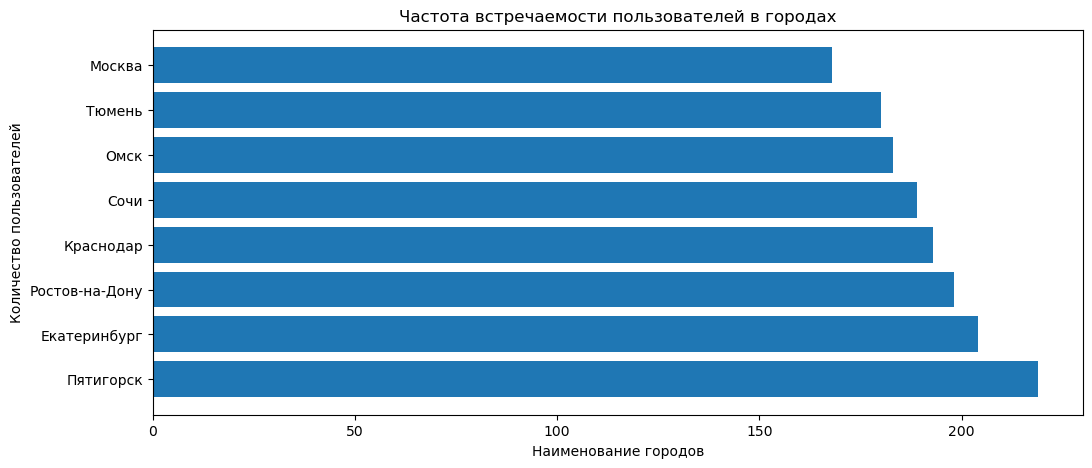

In [13]:
city_counts = data_users['city'].value_counts()

plt.figure(figsize=(12, 5))
plt.barh(city_counts.index, city_counts.values)   
plt.title('Частота встречаемости пользователей в городах')
plt.xlabel('Наименование городов')
plt.ylabel('Количество пользователей')

plt.show()


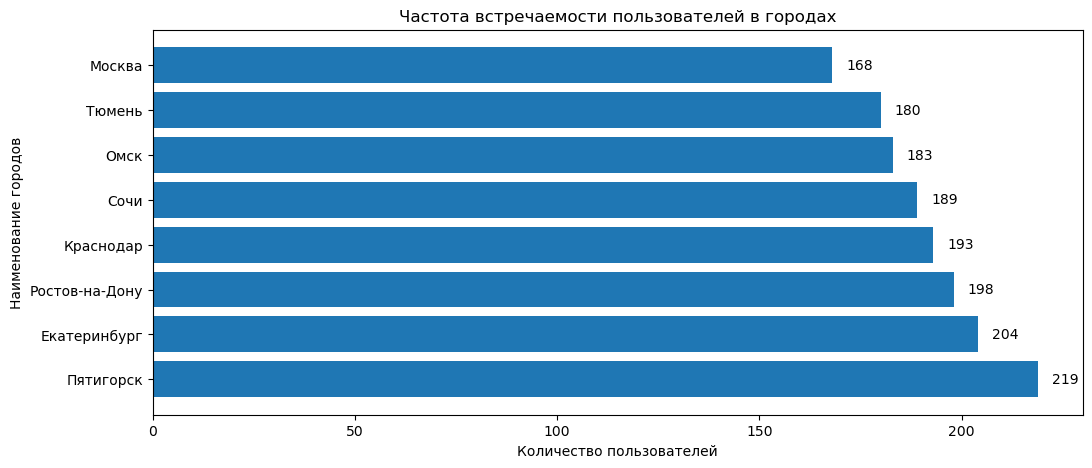

In [14]:
# Код ревьювера:
city_counts = data_users['city'].value_counts()


plt.figure(figsize=(12, 5))
bars = plt.barh(city_counts.index, city_counts.values)

for bar in bars:
    plt.annotate('{}'.format(bar.get_width()),
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(10, 0),  
                 textcoords='offset points',
                 ha='left', va='center')

plt.title('Частота встречаемости пользователей в городах')
plt.xlabel('Количество пользователей')
plt.ylabel('Наименование городов')


plt.show()


In [15]:
data_users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

- Промежутночный вывод: исходя из графиков мы видим, что значения пользователей в городах находятся в промежутке от 168 до 219 пользователей, распределены равномерно, без аномалий по количеству пользователей.  

### Рассмотрим соотношение пользователей с подпиской и без.

Для наглядности построим график количества пользователей с подпиской и без неё.

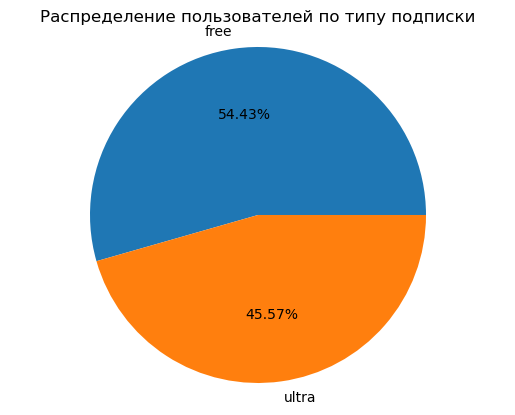

In [16]:
subscription_counts = data_users['subscription_type'].value_counts()

plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Распределение пользователей по типу подписки')
plt.show()

In [17]:
with_subscription = (round
                    (data_users[data_users['subscription_type'] == 'ultra']['subscription_type'].count() / 
                    data_users['subscription_type'].count() * 100, 2)
                    )
no_subscription = (round
                  (data_users[data_users['subscription_type'] == 'free']['subscription_type'].count() / 
                  data_users['subscription_type'].count() * 100, 2)
                  )
display(f'Количество пользователей с подпиской: {with_subscription} %')
display(f'Количество пользователей без подписки: {no_subscription} %')

'Количество пользователей с подпиской: 45.57 %'

'Количество пользователей без подписки: 54.43 %'

- Промежуточный вовод: проанализировав полученные данные мы можем сделать вывод, что количество пользователей без подписки больше на 8.86%.

### Изучим возраст пользователей сервиса.

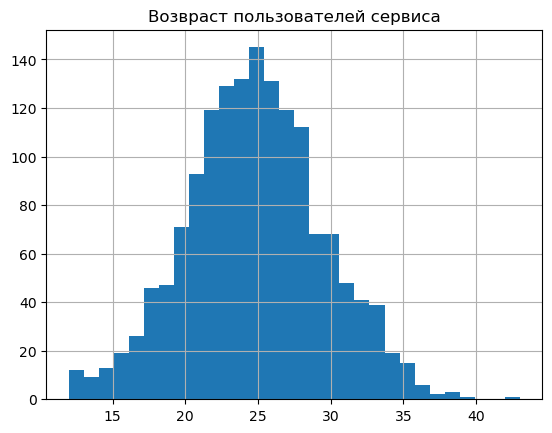

In [18]:
data_users['age'].hist(bins=30)
plt.title('Возвраст пользователей сервиса')
plt.show()

- Промежуточный вывод: проанализировав полученные графики мы можем сделать, что большинство пользователей электросамокатов являются лица от 20 до 27 лет.  
Аренда самокатов возможна лицам от 14 лет, на графике видны пользователи младше этого возраста.

### Рассмотрим расстояние, которое пользователь преодолел за одну поездку.

In [19]:
data_riders.head()

,user_id,distance,duration,date,number_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Округлим значение столбца distance до целого в большую сторону.

In [20]:
data_riders['distance'] = round(data_riders['distance'], 2)
data_riders.head()

,user_id,distance,duration,date,number_month
0,1,4409.92,25.599769,2021-01-01,1
1,1,2617.59,15.816871,2021-01-18,1
2,1,754.16,6.232113,2021-04-20,4
3,1,2694.78,18.511000,2021-08-11,8
4,1,4028.69,26.265803,2021-08-28,8


In [21]:
data_riders['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

<!-- Создадим новый столбец distance_group с расстояниями:
- до 1 км;
- 1-2 км;
- 2-3 км;
- 3-4 км;
- 4-5 км;
- 5-6 км;
- больше 6 км.
   -->

- Промежуточный вывод: на графике выше мы можем сделать вывод, что пользователи сервиса в большинстве случаев преодолевают расстояние от 2,2 до 4 км, меньше преодолевают от 4 до 5 км.  
Расстояния до 2 км и более 4км пользователи преодолевают в разы реже, возможно связано с тем, что на короткие дистанции проще пройти пешком, а на длинные дистанции выгоднее воспользоваться такси/общественным транспортом.

### Продолжительность поездок.

Столбец duration со значениями 6 символов после запятой, округлим эти значения также до целого в большую сторону.	

In [22]:
data_riders['duration'] = np.ceil(data_riders['duration'])
data_riders.head()

,user_id,distance,duration,date,number_month
0,1,4409.92,26.0,2021-01-01,1
1,1,2617.59,16.0,2021-01-18,1
2,1,754.16,7.0,2021-04-20,4
3,1,2694.78,19.0,2021-08-11,8
4,1,4028.69,27.0,2021-08-28,8


In [23]:
data_riders['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

На основе графика мы можем сделать вывод, что пользователи в большинстве случаев проводят от 12 до 24 мин. на самокате.  
Реже самокатами пользуются до 12 мин и более 24 мин.  
Также на графики видны всплески, где длительность поездки оставляет 14, 17 и 21 мин.

## Объединение данных

### Объединяем датафреймы

Объединим датафреймы для удобства работы с ними

In [24]:
new_data = data_users.merge(data_riders, on='user_id')
new_data.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,number_month
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770.89,17.0,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.02,15.0,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.12,24.0,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412.69,16.0,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748.69,16.0,2021-11-22,11


In [25]:
display(f'Размерность до объединения: {data_users.shape[:]}, {data_riders.shape[:]}')
display(new_data.shape[:])
display(new_data.isna().sum())

'Размерность до объединения: (1534, 5), (18068, 5)'

(18068, 9)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
number_month         0
dtype: int64

In [26]:
new_data = new_data.merge(data_subscriptions, on='subscription_type')
new_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199


In [27]:
display(f'Размерность после объединения: {new_data.shape[:]}')
display(new_data.isna().sum())

'Размерность после объединения: (18068, 12)'

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
number_month         0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### Создание двух новых датафреймов с подпиской и без неё.

Создадим два новых датафрейма с пользователями с подпиской и без неё.

In [28]:
new_data_subscriptions = new_data.query('subscription_type == "ultra"').reset_index(drop=True)
new_data_no_subscriptions = new_data.query('subscription_type == "free"').reset_index(drop=True)

display(new_data_subscriptions.head(20))
display(new_data_no_subscriptions.head(20))

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,17.0,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,15.0,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,24.0,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,16.0,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,16.0,2021-11-22,11,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.69,15.0,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.93,17.0,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.43,21.0,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,1205.91,10.0,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,3047.38,18.0,2021-02-14,2,8,50,0
5,700,Айдар,22,Омск,free,4342.00,23.0,2021-02-23,2,8,50,0
6,700,Айдар,22,Омск,free,3798.33,19.0,2021-03-03,3,8,50,0
7,700,Айдар,22,Омск,free,2984.55,16.0,2021-04-09,4,8,50,0
8,700,Айдар,22,Омск,free,3360.11,17.0,2021-06-12,6,8,50,0
9,700,Айдар,22,Омск,free,2567.54,12.0,2021-06-23,6,8,50,0


In [29]:
display(new_data_subscriptions.shape[:])
display(new_data_no_subscriptions.shape[:])

(6500, 12)

(11568, 12)

### Визуализируем и сравниваем длительность и расстояние поездок.

Для корректностни анализа сделаем выборку из 6000 поездок в обоих датафреймах, тк количество поездок различается.

In [30]:
sample_subscriptions = new_data_subscriptions.sample(n=6000, random_state=1)
sample_no_subscriptions = new_data_no_subscriptions.sample(n=6000, random_state=1)

display(sample_no_subscriptions.shape[:])
display(sample_subscriptions.shape[:])

(6000, 12)

(6000, 12)

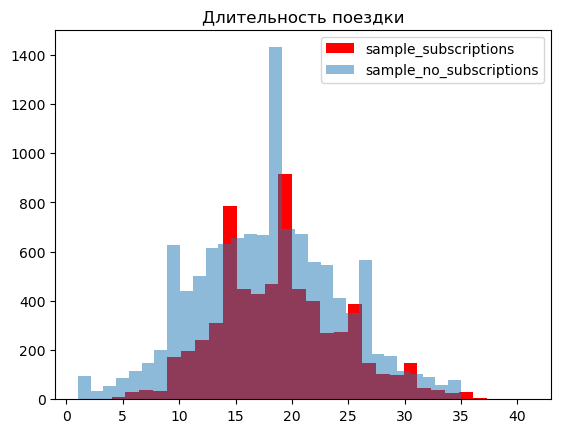

In [31]:
#  Код ревьювера:
plt.hist([new_data_subscriptions['duration']], alpha=1, label='sample_subscriptions', bins=30, color='r')
plt.hist([new_data_no_subscriptions['duration']], alpha=0.5, label='sample_no_subscriptions', bins=30)
plt.legend()
plt.title('Длительность поездки');

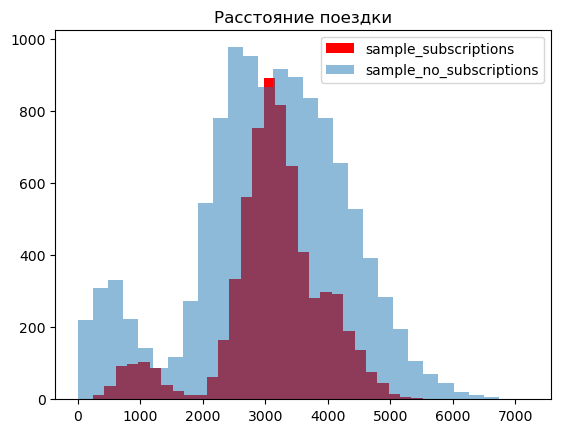

In [32]:
#  Код ревьювера:
plt.hist([new_data_subscriptions['distance']], alpha=1, label='sample_subscriptions', bins=30, color='r')
plt.hist([new_data_no_subscriptions['distance']], alpha=0.5, label='sample_no_subscriptions', bins=30)
plt.legend()
plt.title('Расстояние поездки');

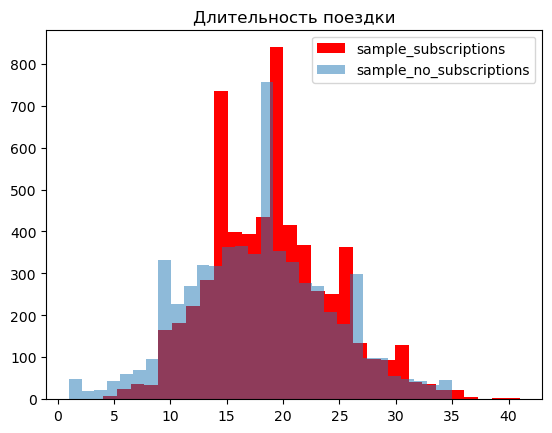

In [33]:
plt.hist([sample_subscriptions['duration']], alpha=1, label='sample_subscriptions', bins=30, color='r')
plt.hist([sample_no_subscriptions['duration']], alpha=0.5, label='sample_no_subscriptions', bins=30)
plt.legend()
plt.title('Длительность поездки');

Проанализировав длительность поездки у пользователей с подпиской и без неё мы можем сделать вывод, что пользователи без подписки чаще катаются до 14 минут, начиная с 14 минуты катаются дольше пользователи с подпиской.

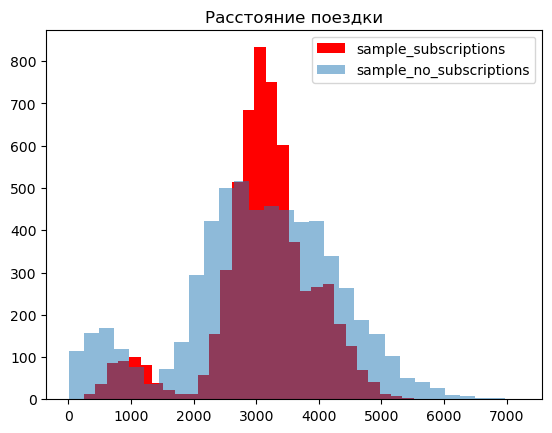

In [34]:
plt.hist([sample_subscriptions['distance']], alpha=1, label='sample_subscriptions', bins=30, color='r')
plt.hist([sample_no_subscriptions['distance']], alpha=0.5, label='sample_no_subscriptions', bins=30)
plt.legend()
plt.title('Расстояние поездки');

На данном графике видно, что пользователи без подписки чаще катаются на расстояния от 0 до 2500 метров и от 3600 до 7000 метров.  
Пользователи с подпиской чаще катаются на расстояния от 2500 до 3600 метров.

## Подсчёт выручки

### Создаём новые датафреймы с агрегированными данными о поездках

Создадим новые датафреймы для пользователей с подпиской и без неё, где будет указана сумма расстояний, количество и длительность поездок за каждый месяц.

In [35]:
group_subscriptions = new_data_subscriptions.groupby(['user_id', 'number_month']).agg({'distance':'sum', 'duration':['count', 'sum']})
group_subscriptions.columns = ['distance', 'count', 'duration']
display(group_subscriptions.isna().sum())
display(group_subscriptions.head(20))

distance    0
count       0
duration    0
dtype: int64

distance  count  duration
user_id number_month                           
1       1              7027.51      2      42.0
        4               754.16      1       7.0
        8              6723.47      2      46.0
        10             5809.91      2      32.0
        11             7003.50      3      56.0
        12             6751.63      2      28.0
2       3             10187.73      3      63.0
        4              6164.39      2      40.0
        6              3255.34      1      14.0
        7              6780.73      2      48.0
        8               923.01      1       7.0
        10             2824.64      1      19.0
        12             3828.25      1      12.0
3       1              3061.78      1      13.0
        2              5421.16      2      39.0
        4              2956.65      1      21.0
        5              9064.03      3      63.0
        7             10919.59      3      67.0
        9              2891.01      1      23.0
        12             2593.38      1      13.0

In [36]:
group_no_subscriptions = new_data_no_subscriptions.groupby(['user_id', 'number_month']).agg({'distance':'sum', 'duration':['count', 'sum']})
group_no_subscriptions.columns = ['distance', 'count', 'duration']
display(group_no_subscriptions.isna().sum())
display(group_no_subscriptions.head(20))

distance    0
count       0
duration    0
dtype: int64

distance  count  duration
user_id number_month                           
700     1              2515.69      1      15.0
        2             13446.65      5      89.0
        3              3798.33      1      19.0
        4              2984.55      1      16.0
        6              5927.65      2      29.0
        7              4399.20      2      21.0
        8              4071.65      1      17.0
        10             6322.58      2      44.0
        11             8735.79      3      32.0
701     1              2676.47      1      18.0
        2              5637.34      2      27.0
        3              2802.02      1      17.0
        4              3509.01      1      14.0
        5              2465.85      1      15.0
        6              4634.62      2      26.0
        7             12970.72      4      66.0
        8              7628.76      2      19.0
        9              8659.57      2      33.0
        10             8395.26      2      44.0
        12             2773.40      2      23.0

### Добавляем новый столбец с выручкой

Добавляем новый столбец "revenue", где будет указана выручка за каждого пользователя по месяцам.

In [37]:
group_subscriptions['revenue'] = 199 + group_subscriptions['duration']*6
group_no_subscriptions['revenue'] = group_no_subscriptions['duration']*8 + group_no_subscriptions['count']*50

display(group_subscriptions.head())
display(group_no_subscriptions.head())


distance  count  duration  revenue
user_id number_month                                    
1       1              7027.51      2      42.0    451.0
        4               754.16      1       7.0    241.0
        8              6723.47      2      46.0    475.0
        10             5809.91      2      32.0    391.0
        11             7003.50      3      56.0    535.0

distance  count  duration  revenue
user_id number_month                                    
700     1              2515.69      1      15.0    170.0
        2             13446.65      5      89.0    962.0
        3              3798.33      1      19.0    202.0
        4              2984.55      1      16.0    178.0
        6              5927.65      2      29.0    332.0

## Проверка гипотез.

### Тратят ли пользователи с подпиской больше времени на поездки?

Гипотеза 1: "Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании."   
- Нулевая гипотеза: пользователи с подпиской и без подписки тратят одинаковое количество времени на поездки.
- Альтернативная гипотеза: пользователи с подпиской в среднем тратят больше времени, чем пользователи без подписки.

Создадим односторонний ttest с независимыми выборками.

In [38]:
display(group_subscriptions.shape[:])
display(group_no_subscriptions.shape[:])

(4533, 4)

(6798, 4)

In [39]:
print('Среднее время поездки с подпиской:', new_data_subscriptions['duration'].mean()) 
print('Среднее время поездки без подписки:', new_data_no_subscriptions['duration'].mean()) 

alpha = 0.05

results = st.ttest_ind(new_data_subscriptions['duration'], new_data_no_subscriptions['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Среднее время поездки с подпиской: 19.037692307692307
Среднее время поездки без подписки: 17.890992392807746
p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Среднее время поездки с подпиской выше на 1,1 мин., подтвердилась альтернативная гипотеза о том, что пользователи с подпиской в среднем тратят больше времени на поездку.

### Проезжают ли пользователи с подпиской за одну поездку 3130 метров?

Гипотеза 2: " Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.  
Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?"  
- Нулевая гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 
- Альтернативная гипотеза: в среднем пользователи с подпиской за одну поездку проезжают расстояние больше 3130 метров. 

Создадим односторонний ttest для одной выборки.

In [40]:
print('Средняя дистанция поездки с подпиской:', new_data_subscriptions['distance'].mean())

value = 3130
alpha = 0.05

results = st.ttest_1samp(new_data_subscriptions['distance'], value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя дистанция поездки с подпиской: 3115.445430769231
p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


Средня дистанция поездки с подпиской составила 3115,5 м.,
Нулевую гипотезу о том, что пользователи с подпиской преодолевают расстояние до 3130 м. не отвергаем.

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Гипотеза 3: "Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?".  
- Нулевая гипотеза - средняя выручка от пользователей с подпиской равна средней выручки от пользователей без подписки.  
- Альтернативная гипотеза - средняя выручка от пользователей с подпиской больше средней выручки от пользователей без подписки.    

Чтобы проверить данную гипотезу построем графики с выручкой по месяцам у пользователей с подпиской и без неё.  

In [41]:
print('Средняя прибыль с подпиской:', group_subscriptions['revenue'].mean()) 
print('Средняя прибыль без подписки:', group_no_subscriptions['revenue'].mean()) 

alpha = 0.05

results = st.ttest_ind(group_subscriptions['revenue'], group_no_subscriptions['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя прибыль с подпиской: 362.7921906022502
Средняя прибыль без подписки: 328.6413651073845
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Изучив данные мы можем сделать вывод, что пользователи с подпиской приносят прибыли на 34,2 р. больше, чем пользователи без подписки (почти 10%), альтернативная гипотеза подтвердилась.

### Какой тест необходим, для проверки следующей гипотезы?

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

- Для проверки данной гипотезы потребуется односторонний двухвыборочный t-тест для зависимых выборок

## Общий вывод исследования.

Проведя исследование исходя из данных пользователей сервиса по аренде самокатов мы можем сделать следующие выводы:  
- пользователей без подписки больше на 8.86%;
- большинство пользователей электросамокатов являются лица от 20 до 27 лет;
- пользователи сервиса в большинстве случаев преодолевают расстояние от 2 до 4 км;
- пользователи в большинстве случаев проводят от 12 до 24 мин. на самокате;
- пользователи без подписки чаще катаются до 14 минут, начиная с 14 минуты катаются дольше пользователи с подпиской.
- пользователи без подписки чаще катаются на расстояния от 0 до 2500 метров и от 3600 до 7000 метров. Пользователи с подпиской чаще катаются на расстояния от 2500 до 3600 метров.

В ходе исследования также было 3 гипотезы.  
Гипотеза 1: "Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании."
- Среднее время поездки с подпиской выше на 1,1 мин., подтвердилась альтернативная гипотеза о том, что пользователи с подпиской тратят больше времени на поездку.

Гипотеза 2: " Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.  
Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?"
- Подтвердилась нулевая гипотеза: "расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.", средняя дистанция составила 3115 метров.

Гипотеза 3: "Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?".
- Пользователи с подпиской приносят прибыли на 34,2 р. больше, чем пользователи без подписки (почти 10%), альтернативная гипотеза о том, что пользователи с подпиской приносят доход больше подтвердилась.

Полученные результаты в ходе исследования данных пользователей сервиса помогут вырасти бизнесу и увеличить выручку.

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
    
Жду работу на повторное ревью :)

<div class="alert alert-success">
<b>Комментарий ревьюера ✅V2:</b> 
    
Уже лучше, но нужно поправить несколько мест, чтобы я смог принять работу :)

<div class="alert alert-success">
<b>Комментарий ревьюера ✅V3:</b> 
    
Осталось переделать гипотезы и вывод, тогда смогу принять работу!

<div class="alert alert-success">

#### <b>Комментарий ревьюера ✅ V4:</b>

Ренат, поздравляю с закрытием работы, желаю дальнейших успехов в Практикуме!
    
Рекоменую доразобрать тему статистического теста для закрепления
    